**Sam Polyakov**

Spring 2024

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a. Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [65]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b. Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c. Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean squared error.

The plot created by running the below cell should "look right" to you.

MSE: 71.81095284569933


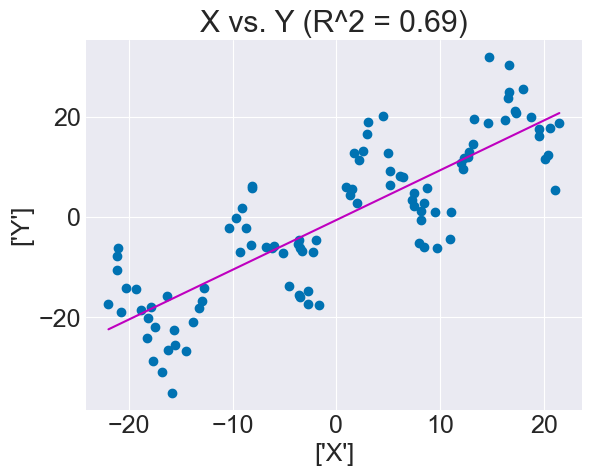

In [66]:
poly_filename = 'data/poly_data.csv'
poly_data = data.Data(poly_filename)
lin_reg = linear_regression.LinearRegression(poly_data)
lin_reg.poly_regression('X', 'Y', 1)

lin_reg.scatter('X', 'Y', 'X vs. Y')
print('MSE:', lin_reg.mse)
lin_reg.show()

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

MSE: 55.03088073278098


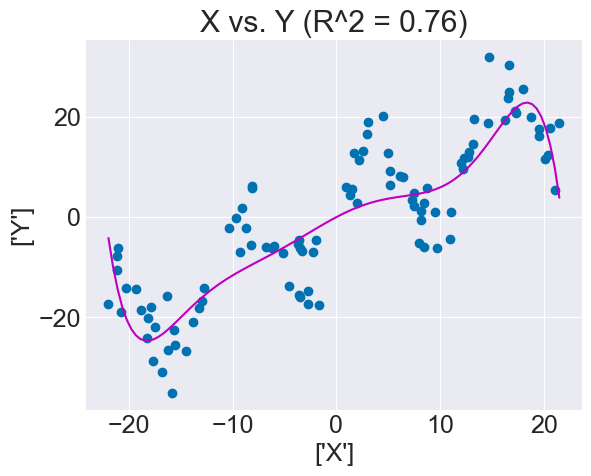

In [67]:
poly_filename = 'data/poly_data.csv'
poly_data = data.Data(poly_filename)
lin_reg = linear_regression.LinearRegression(poly_data)
lin_reg.poly_regression('X', 'Y', 7)

lin_reg.scatter('X', 'Y', 'X vs. Y')
print('MSE:', lin_reg.mse)
lin_reg.show()

### 3d. Questions

**Question 5:** Describe the `p=7` fit compared to `p=1` — is it better or worse? Why?

**Question 6:** Describe what happens visually to the shape of the regression curve and in relation to the data as you experiment with the polynomial degree between 1 and 7. 

**Question 7:** Create and interpret a plot showing the MSE values as the polynomial degree goes from 1 to 7.

**Answer 5:** It is better because it 'conforms' to the points so it can go through more points and adjust itself accordingly.

**Answer 6:** The regression curve curves more and more to conform to the data points as you increase the polynomial degree

**Answer 7:** 

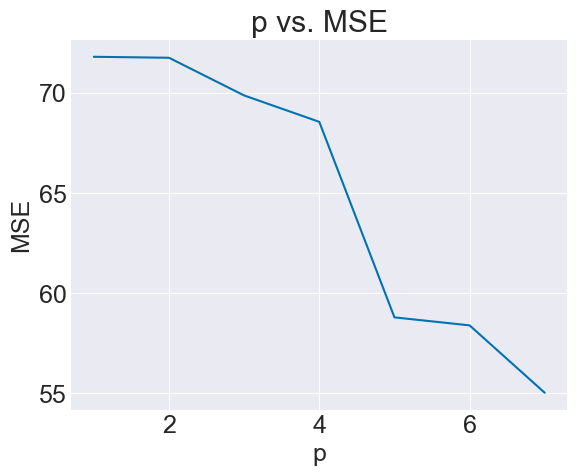

In [49]:
vals = []
for i in range(7):
    lin_reg.poly_regression('X', 'Y', i+1)
    vals.append(lin_reg.mse)
plt.plot(np.arange(1,8), vals)
plt.ylabel('MSE')
plt.xlabel('p')
plt.title('p vs. MSE')
plt.show()

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a. Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

The data samples are already shuffled.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [59]:
fit = data.Data(filepath = 'data/poly_data.csv')
fit.limit_samples(0, 50)
print(fit)

val = data.Data(filepath = 'data/poly_data.csv')
val.limit_samples(50, 100)
print(val)

-------------------------------
data/poly_data.csv (50x2)
Headers:
  X   Y
-------------------------------
Showing first 5/50 rows.
2.147   11.382
9.465   1.034
4.52   20.251
1.974   2.89
-3.358   -6.809
-------------------------------

-------------------------------
data/poly_data.csv (50x2)
Headers:
  X   Y
-------------------------------
Showing first 5/50 rows.
-3.65   -4.658
9.69   -6.107
-21.986   -17.271
-8.694   -2.22
-15.536   -25.608
-------------------------------



Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b. Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

96.45877543079379


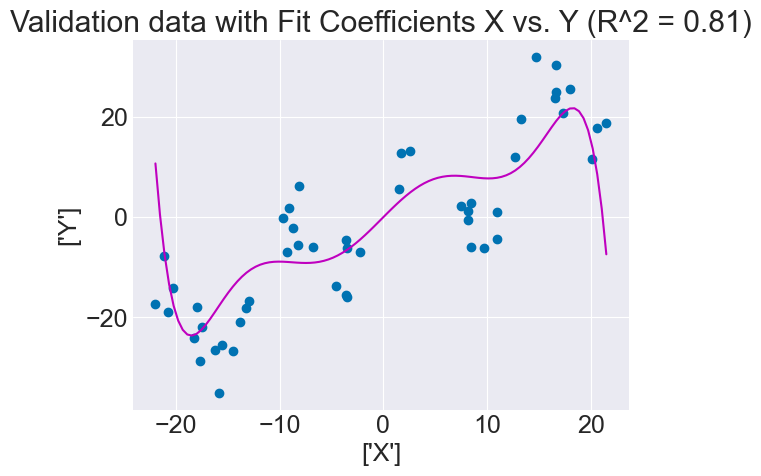

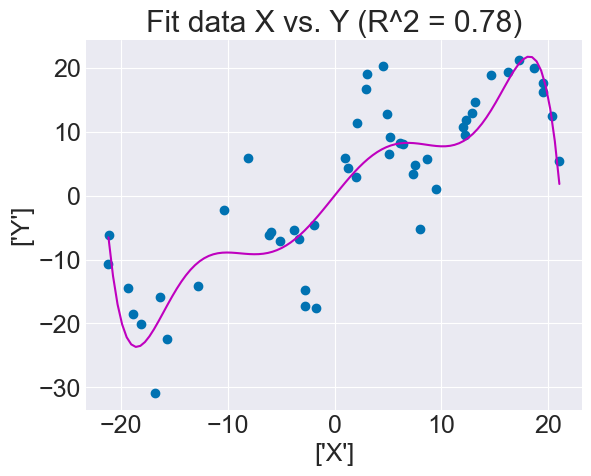

In [69]:
fit_reg = linear_regression.LinearRegression(fit)
fit_reg.poly_regression('X', 'Y', 7)
val_reg = linear_regression.LinearRegression(val)
val_reg.poly_regression('X', 'Y', 7)
fit_slope = fit_reg.get_fitted_slope()
fit_intercept = fit_reg.get_fitted_intercept()
val_reg.initialize('X', 'Y', fit_slope, fit_intercept, 7)
print(val_reg.compute_mse())
val_reg.scatter('X', 'Y', 'Validation data with Fit Coefficients X vs. Y')
plt.show()
fit_reg.scatter('X', 'Y', 'Fit data X vs. Y')

### 4c. Questions

**Question 8:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 9:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSE, $R^2$).

**Question 10:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 11:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSE, $R^2$).

**Answer 8:** They do a very good job, having an even higher R^2 than the fit set. This is because the fit data has more outliers, but the data is similar other than that.

**Answer 9:** The generalization worsens for polynomial degrees < 7. The R^2 for the Validation data stays at 0.81 until you get down to p=4, at which point it drops to 0.72. The R^2 for the Fit data immediately drops from 0.78 to 0.72 when going from p=7 to p=6

**Answer 10:** The R^2 significantly increases at p=5. This is likely due to it not having enough 'flexibility' to conform to the data well at lower p values. The R^2 at degree 5 is 0.81 and the MSE is 53.35, while at degree 4, the R^2 was 0.72 and the MSE was 78.08.

**Answer 11:** As you increase the p value, the generalization greatly improves. At degree 10, the R^2 is 0.91 and the MSE is 24.84. At degree 12, the R^2 is 0.95 and the MSE is 13.61. This is likely because as the p value increases, the line has more flexibility to conform to the data. 

91.37791686898431


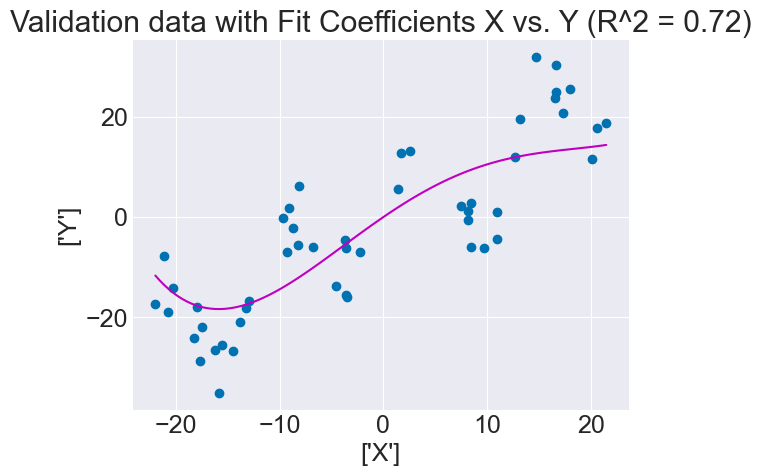

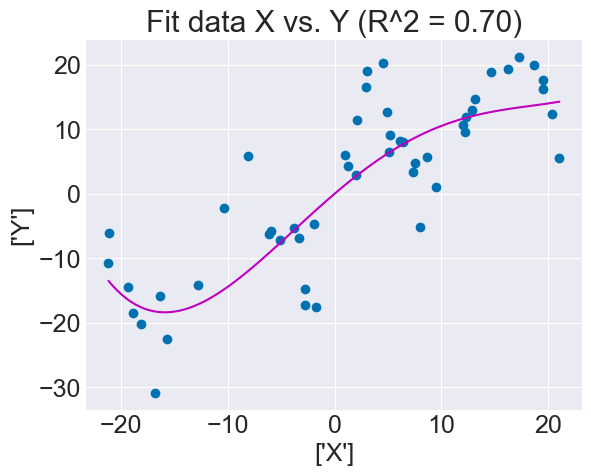

In [86]:
p = 4
fit_reg = linear_regression.LinearRegression(fit)
fit_reg.poly_regression('X', 'Y', p)
val_reg = linear_regression.LinearRegression(val)
val_reg.poly_regression('X', 'Y', p)
fit_slope = fit_reg.get_fitted_slope()
fit_intercept = fit_reg.get_fitted_intercept()
val_reg.initialize('X', 'Y', fit_slope, fit_intercept, p)
print(val_reg.compute_mse())
val_reg.scatter('X', 'Y', 'Validation data with Fit Coefficients X vs. Y')
plt.show()
fit_reg.scatter('X', 'Y', 'Fit data X vs. Y')

## Extensions


### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

### 2. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

MSE: 50.60279673114832


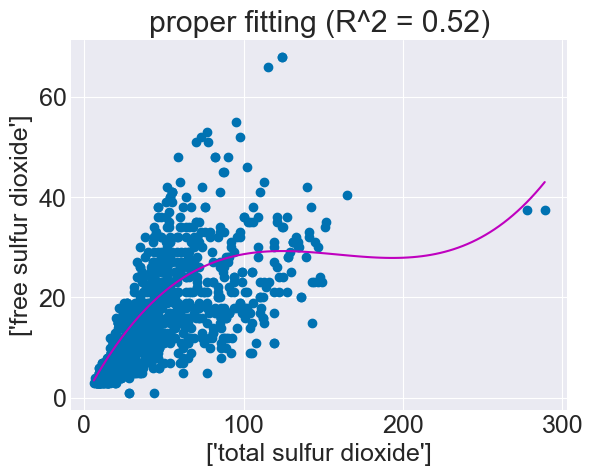

In [113]:
wine_filename = 'data/wineQT.csv'
wine_data = data.Data(wine_filename)

lin_reg = linear_regression.LinearRegression(wine_data)
lin_reg.poly_regression('total sulfur dioxide', 'free sulfur dioxide', 3)

lin_reg.scatter('total sulfur dioxide', 'free sulfur dioxide', 'proper fitting')
print('MSE:', lin_reg.mse)
lin_reg.show()

MSE: 74.09387432510584


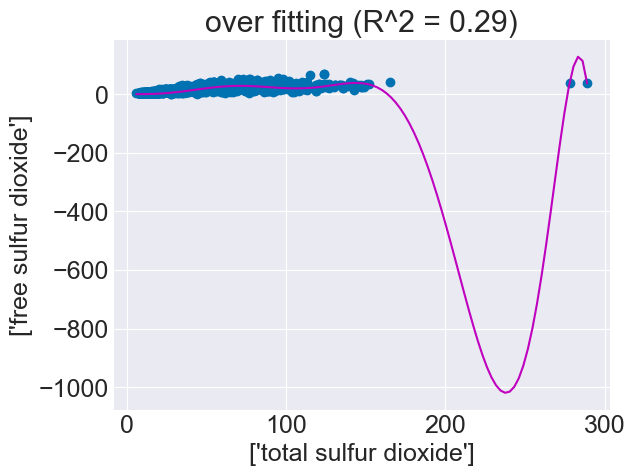

In [127]:
wine_filename = 'data/wineQT.csv'
wine_data = data.Data(wine_filename)

lin_reg = linear_regression.LinearRegression(wine_data)
lin_reg.poly_regression('total sulfur dioxide', 'free sulfur dioxide', 9)

lin_reg.scatter('total sulfur dioxide', 'free sulfur dioxide', 'over fitting')
print('MSE:', lin_reg.mse)
lin_reg.show()

I decided to further explore the Wine Quality data set to see if any of the different data points directly influenced each other. I expected there to be a strong positive correlation between the two variables. While there is a correlation, it is not as strong or as linear as I would have expected. Becuase the data points were so dense, it was very difficult to get a polynomial regression line that properly fit the data, and I found it easy to overfit the data. I found that at p = 8 and higher, there tended to be lots of overfitting happening. This was likely because there was a large gap between most of the data and the two 'outliers', so the line had a significant dip in the gap. Somewhat surpringly, the R^2 value only decreased by 0.5 when the p value went from 7 to 8, but then almost halved when going from 8-9. This seems to be happening because having a higher p value allows the 'dip' that occurs in the gap to be much more extreme.